In [30]:
import pandas as pd
import numpy as np
import time
import datetime
 
from scipy.sparse import csr_matrix
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

path = r'C:/Users/18401/Downloads/watch_vod2.csv'
data = pd.read_csv(path)

data.drop_duplicates(keep='last',inplace=True)
data.dtypes
data.isnull().sum()

uuidnum = len(data['deviceID'].unique())
videoidnum = len(data['data.videoID'].unique())


In [31]:
Action = data['data.dragCount'].groupby([data['deviceID'],data['data.videoID']]).count()

Action = Action.reset_index()

num2uuid = dict(zip(range(uuidnum),data['deviceID'].unique()))
uuid2num = dict(zip(data['deviceID'].unique(),range(uuidnum)))

num2videoID = dict(zip(range(videoidnum),data['data.videoID'].unique()))
videoID2num = dict(zip(data['data.videoID'].unique(),range(videoidnum)))

row = Action['deviceID'].apply(lambda x:uuid2num[x])
col = Action['data.videoID'].apply(lambda x:videoID2num[x])

Dragcounttable = csr_matrix((Action['data.dragCount'], (row,col)),shape = (uuidnum,videoidnum)).toarray()
Dragcounttable

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

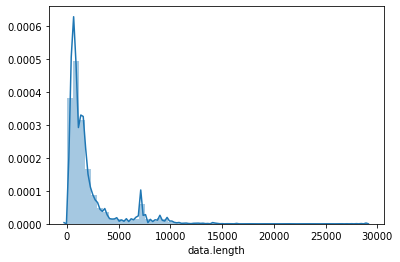

In [32]:
Tempdata = data[(data['data.play'] > 0) & (data['data.play'] < data["data.length"])&(data['data.play'] < data["data.stay"])]
#播放时长大于0，播放时长小于影片时长，播放时长小于停留时长

#sns.distplot(Tempdata['data.play'])
sns.distplot(Tempdata['data.length'])
stay = Tempdata['data.play'].groupby([Tempdata['deviceID'],Tempdata['data.videoID']]).sum()
stay = stay.reset_index()

row = stay['deviceID'].apply(lambda x:uuid2num[x])
col = stay['data.videoID'].apply(lambda x:videoID2num[x])

playtable = csr_matrix((stay['data.play'], (row,col)),shape = (uuidnum,videoidnum)).toarray()

## 观看时长的分布图

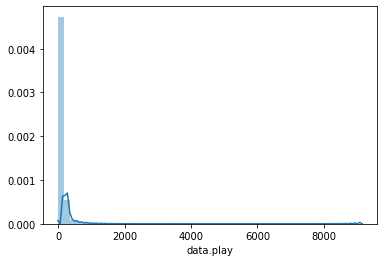

In [33]:
sns.distplot(Tempdata['data.play'])

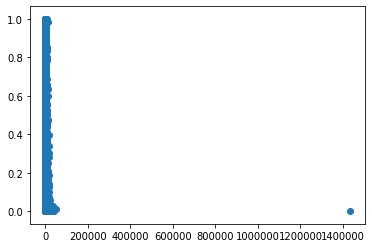

In [34]:
plt.scatter(Tempdata['data.avg'],Tempdata['data.play']/Tempdata['data.length'])

0.09220059413624024

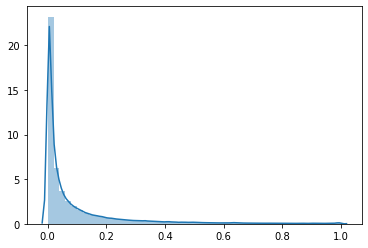

In [37]:
sns.distplot(Tempdata['data.play']/Tempdata['data.length'])
## 观看时长除以影片时长的分布图
temp=Tempdata['data.play']/Tempdata['data.length']
np.mean(temp)
#大多数人的观看进度小于20%

0.1603856842345647

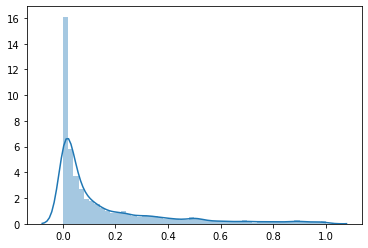

In [47]:
Tempdata = data[(data['data.play'] > 0)&(data['v_type']==8) & (data['data.play'] < data["data.length"])&(data['data.play'] < data["data.stay"])]
#播放时长大于0，播放时长小于影片时长，播放时长小于停留时长

#sns.distplot(Tempdata['data.play']/Tempdata['data.length'])
#Tempdata = data[(data['data.play'] > 0)&(data['isNewbee']==1) & (data['data.play'] < data["data.length"])&(data['data.play'] < data["data.stay"])]

sns.distplot(Tempdata['data.play']/Tempdata['data.length'])
#Tempdata = data[(data['data.play'] > 0)&(data['isVip']==1) & (data['data.play'] < data["data.length"])&(data['data.play'] < data["data.stay"])]
#sns.distplot(Tempdata['data.play']/Tempdata['data.length'])
np.mean(Tempdata['data.play']/Tempdata['data.length'])

0.08237581556967453

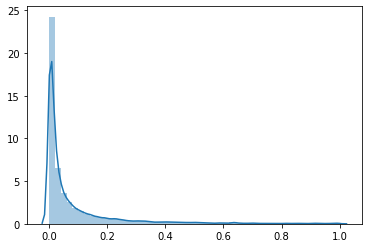

In [83]:
Tempdata = data[(data['data.play'] > 0)&(data['isNewbee'] ==1) & (data['data.play'] < data["data.length"])&(data['data.play'] < data["data.stay"])]

sns.distplot(Tempdata['data.play']/Tempdata['data.length'])
#Tempdata = data[(data['data.play'] > 0)&(data['isVip']==1) & (data['data.play'] < data["data.length"])&(data['data.play'] < data["data.stay"])]
#sns.distplot(Tempdata['data.play']/Tempdata['data.length'])
np.mean(Tempdata['data.play']/Tempdata['data.length'])
#n=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).count()
#nn=Tempdata['data.play'].groupby([Tempdata['deviceID']]).count()
#nn


In [ ]:
Tempdata = data[(data['data.play'] > 0) & (data['data.play'] < data["data.length"])&(data['data.play'] < data["data.stay"])]
mostclick=Tempdata['data.dragCount'].groupby([Tempdata['data.videoID']]).sum()
moststay=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).sum()

sns.distplot(mostclick)

## 总拖拽次数的分布图

In [ ]:
Tempdata = data[(data['data.play'] > 0) & (data['data.play'] < data["data.length"])&(data['data.play'] < data["data.stay"])]
mostclick=Tempdata['data.dragCount'].groupby([Tempdata['data.videoID']]).sum()
moststay=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).sum()
import matplotlib.pyplot as plt
plt.scatter(mostclick,moststay)

## 影片总观看时长与总拖拽次数的散点图

## 二者有较强的正相关关系

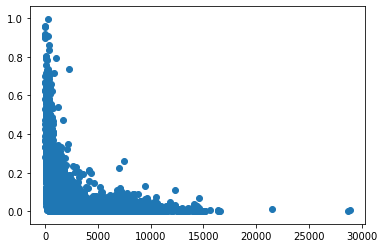

In [39]:
Tempdata = data[(data['data.play'] > 0) & (data['data.play'] < data["data.length"])&(data['data.play'] < data["data.stay"])]
stayt=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).sum()
n=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).count()
lengtht=Tempdata['data.length'].groupby([Tempdata['data.videoID']]).sum()
nn=Tempdata['data.length'].groupby([Tempdata['data.videoID']]).count()
import matplotlib.pyplot as plt
plt.scatter(lengtht/nn,(stayt/n)/(lengtht/nn))

#staytt=mean(stayt)
#plt.scatter(lengtht/n,staytt/n)
## 影片时长与平均观看时长的散点图

## （a）无论影片长短，多数影片的平均观看时长在1000s以下
## （b）影片总时长越长，人们的观看时长越短。换句话说，人们对于总时长较长的影片，倾向于用较少的时间来判断是否要继续看下去
## （c）有些影片广受大众欢迎

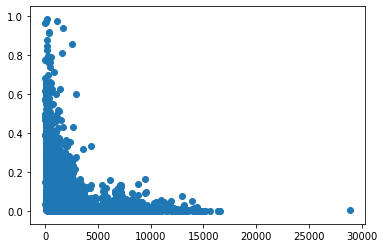

In [85]:
Tempdata = data[(data['isVip'] ==1)& (data['data.play'] > 0) & (data['data.play'] < data["data.length"])&(data['data.play'] < data["data.stay"]) ]
stayt=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).sum()
n=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).count()
lengtht=Tempdata['data.length'].groupby([Tempdata['data.videoID']]).sum()
nn=Tempdata['data.length'].groupby([Tempdata['data.videoID']]).count()
import matplotlib.pyplot as plt
#plt.scatter(lengtht/nn,stayt/n)
plt.scatter(lengtht/nn,(stayt/n)/(lengtht/nn))

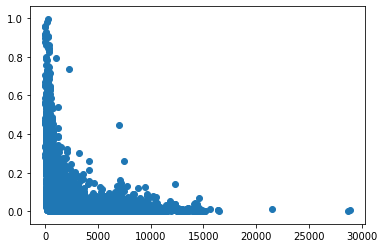

In [84]:
Tempdata = data[(data['isVip'] ==0)& (data['data.play'] > 0) & (data['data.play'] < data["data.length"])&(data['data.play'] < data["data.stay"]) ]
stayt=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).sum()
n=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).count()
lengtht=Tempdata['data.length'].groupby([Tempdata['data.videoID']]).sum()
nn=Tempdata['data.length'].groupby([Tempdata['data.videoID']]).count()
import matplotlib.pyplot as plt
#plt.scatter(lengtht/nn,stayt/n)
plt.scatter(lengtht/nn,(stayt/n)/(lengtht/nn))

In [18]:
 #会员（上图）与非会员（下图）影片时长与平均观看时长的散点图
    
 #对于同一时长影片，会员的平均观看时长高于非会员

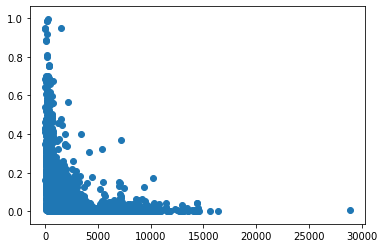

In [87]:
Tempdata = data[(data['isNewbee'] ==1)& (data['data.play'] > 0) & (data['data.play'] < data["data.length"])&(data['data.play'] < data["data.stay"]) ]
stayt=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).sum()
n=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).count()
lengtht=Tempdata['data.length'].groupby([Tempdata['data.videoID']]).sum()
nn=Tempdata['data.length'].groupby([Tempdata['data.videoID']]).count()
import matplotlib.pyplot as plt
#plt.scatter(lengtht/nn,stayt/n)
plt.scatter(lengtht/nn,(stayt/n)/(lengtht/nn))

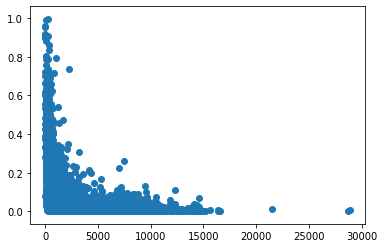

In [86]:
Tempdata = data[(data['isNewbee'] ==0)& (data['data.play'] > 0) & (data['data.play'] < data["data.length"])&(data['data.play'] < data["data.stay"]) ]
stayt=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).sum()
n=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).count()
lengtht=Tempdata['data.length'].groupby([Tempdata['data.videoID']]).sum()
nn=Tempdata['data.length'].groupby([Tempdata['data.videoID']]).count()
import matplotlib.pyplot as plt
#plt.scatter(lengtht/nn,stayt/n)
plt.scatter(lengtht/nn,(stayt/n)/(lengtht/nn))

In [21]:
 #新用户（上图）与老用户（下图）观看时长除以影片时长的直方图
    
 #对于同一时长影片，老用户的平均观看时长大于新用户，产生了用户粘性

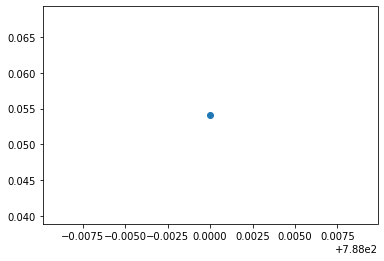

In [66]:
Tempdata = data[(data['v_type'] ==5)& (data['data.play'] > 0) & (data['data.play'] < data["data.length"])&(data['data.play'] < data["data.stay"]) ]
stayt=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).sum()
n=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).count()
lengtht=Tempdata['data.length'].groupby([Tempdata['data.videoID']]).sum()
nn=Tempdata['data.length'].groupby([Tempdata['data.videoID']]).count()
import matplotlib.pyplot as plt
#plt.scatter(lengtht/nn,stayt/n)
plt.scatter(lengtht/nn,(stayt/n)/(lengtht/nn))


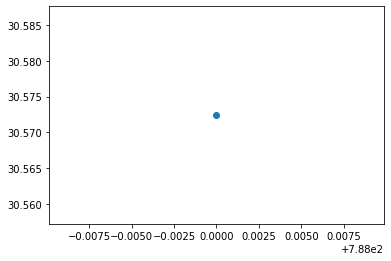

In [59]:
Tempdata = data[(data['v_type'] ==5)& (data['data.play'] > 0) & (data['data.play'] < data["data.length"])&(data['data.play'] < data["data.stay"]) ]
stayt=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).sum()
n=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).count()
lengtht=Tempdata['data.length'].groupby([Tempdata['data.videoID']]).sum()
nn=Tempdata['data.length'].groupby([Tempdata['data.videoID']]).count()
import matplotlib.pyplot as plt
plt.scatter(lengtht/nn,stayt/n)

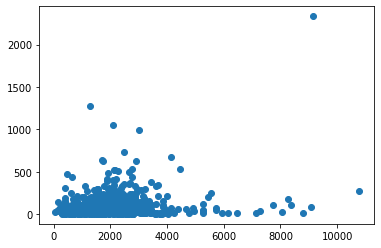

In [84]:
Tempdata = data[(data['v_type'] ==3)& (data['data.play'] > 0) & (data['data.play'] < data["data.length"])&(data['data.play'] < data["data.stay"]) ]
stayt=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).sum()
n=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).count()
lengtht=Tempdata['data.length'].groupby([Tempdata['data.videoID']]).sum()
nn=Tempdata['data.length'].groupby([Tempdata['data.videoID']]).count()
import matplotlib.pyplot as plt
plt.scatter(lengtht/nn,stayt/n)

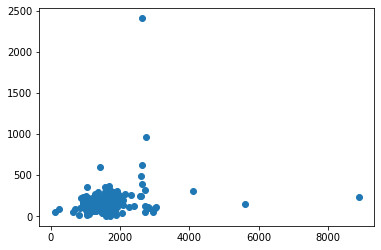

In [85]:
Tempdata = data[(data['v_type'] ==4)& (data['data.play'] > 0) & (data['data.play'] < data["data.length"])&(data['data.play'] < data["data.stay"]) ]
stayt=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).sum()
n=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).count()
lengtht=Tempdata['data.length'].groupby([Tempdata['data.videoID']]).sum()
nn=Tempdata['data.length'].groupby([Tempdata['data.videoID']]).count()
import matplotlib.pyplot as plt
plt.scatter(lengtht/nn,stayt/n)

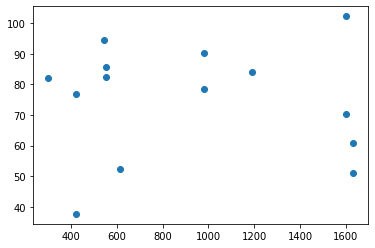

In [86]:
Tempdata = data[(data['v_type'] ==0)& (data['data.play'] > 0) & (data['data.play'] < data["data.length"])&(data['data.play'] < data["data.stay"]) ]
stayt=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).sum()
n=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).count()
lengtht=Tempdata['data.length'].groupby([Tempdata['data.videoID']]).sum()
nn=Tempdata['data.length'].groupby([Tempdata['data.videoID']]).count()
import matplotlib.pyplot as plt
plt.scatter(lengtht/nn,stayt/n)

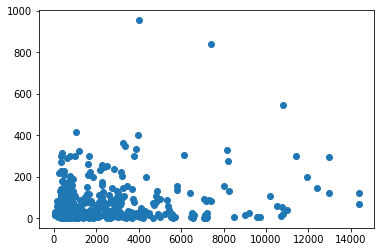

In [87]:
Tempdata = data[(data['v_type'] ==93)& (data['data.play'] > 0) & (data['data.play'] < data["data.length"])&(data['data.play'] < data["data.stay"]) ]
stayt=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).sum()
n=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).count()
lengtht=Tempdata['data.length'].groupby([Tempdata['data.videoID']]).sum()
nn=Tempdata['data.length'].groupby([Tempdata['data.videoID']]).count()
import matplotlib.pyplot as plt
plt.scatter(lengtht/nn,stayt/n)

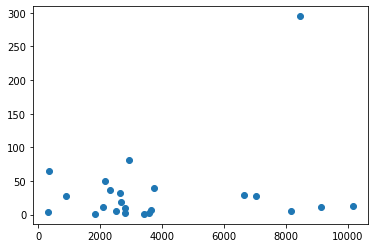

In [27]:
Tempdata = data[(data['v_type'] ==94)& (data['data.play'] > 0) & (data['data.play'] < data["data.length"])&(data['data.play'] < data["data.stay"]) ]
stayt=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).sum()
n=Tempdata['data.play'].groupby([Tempdata['data.videoID']]).count()
lengtht=Tempdata['data.length'].groupby([Tempdata['data.videoID']]).sum()
nn=Tempdata['data.length'].groupby([Tempdata['data.videoID']]).count()
import matplotlib.pyplot as plt
plt.scatter(lengtht/nn,stayt/n)

In [ ]:
import pandas as pd
import numpy as np
import time
import datetime
 
from scipy.sparse import csr_matrix
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

path = r'C:/Users/18401/Downloads/data_YT.csv'
data = pd.read_csv(path)
data.drop_duplicates(keep='last',inplace=True)

data_PAY = data[ (data['event']=='PAY')  ]
x=[3,4,5,6,7,8,9,10,12,13,14,15,16]
data_PAY=data_PAY.drop(data_PAY.columns[x], axis=1, inplace=True)
data_PAY

In [16]:
data_WATCH = data[ (data['event']=='WATCH')  ]


In [15]:
Tempdata=merge(data_PAY,data_WATCH)

NameError: name 'merge' is not defined